In [18]:
import pandas as pd
import os
import manhattan_plot
from manhattan_plot import ManhattanPlot
import matplotlib.pyplot as plt

In [3]:
annotDF = pd.read_csv('Data/UKB_breast_cancer_biofilter_genes_rsids.csv')
annotDF = annotDF.rename(columns={'Gene': 'ID'})
annotDF

,Var_ID,RSID,#CHROM,POS,ID
0,1_17636371_G_A,rs145826559,1,17636371,ARHGEF10L
1,1_17712483_C_T,rs565452104,1,17712483,ARHGEF10L/LINC02810
2,1_50769347_T_C,rs6691061,1,50769347,FAF1
3,1_50771522_T_C,rs10888708,1,50771522,FAF1
4,1_50771737_G_C,rs12569177,1,50771737,FAF1
...,...,...,...,...,...
3450,22_40661666_C_T,rs113860965,22,40661666,LOC124905123
3451,22_40661973_C_T,rs7284506,22,40661973,LOC124905123
3452,22_40663167_A_G,rs79898470,22,40663167,LOC124905123
3453,22_40664849_A_T,rs73171017,22,40664849,LOC124905123


In [12]:
known_genes = ['BRCA1', 'BRCA2', 'BCAS4', 'ESR1', 'NEK10', 'FAF1']
known_genes

['BRCA1', 'BRCA2', 'BCAS4', 'ESR1', 'NEK10', 'FAF1']

In [9]:
mp = ManhattanPlot(file_path='Data/UKB_breast_cancer_smaller.tsv',
                   title='UKBB Breast Cancer GWAS',
                   test_rows=None)

mp.load_data()
mp.clean_data(col_map={'hm_chrom': '#CHROM',
                       'hm_pos': 'POS',
                       'p_value': 'P',
                       'hm_variant_id': 'ID'})
mp.add_annotations(annotDF, extra_cols=['RSID'])
mp.get_thinned_data()

Loaded 154967 Rows
Index(['hm_variant_id', 'hm_rsid', 'hm_chrom', 'hm_pos', 'hm_other_allele',
       'hm_effect_allele', 'hm_beta', 'hm_odds_ratio', 'hm_ci_lower',
       'hm_ci_upper', 'hm_effect_allele_frequency', 'hm_code', 'chromosome',
       'variant_id', 'base_pair_location', 'effect_allele', 'other_allele',
       'n', 'effect_allele_frequency', 'beta', 'standard_error', 'p_value',
       'odds_ratio', 'ci_lower', 'ci_upper'],
      dtype='object')
123807 Variants After Thinning


2.0
ROUNDED_Y
Due to signal merging and replication prioritization, the following genes were renamed:
NEK10: NEK10
LOC124901435: ESR1
FAF1: FAF1


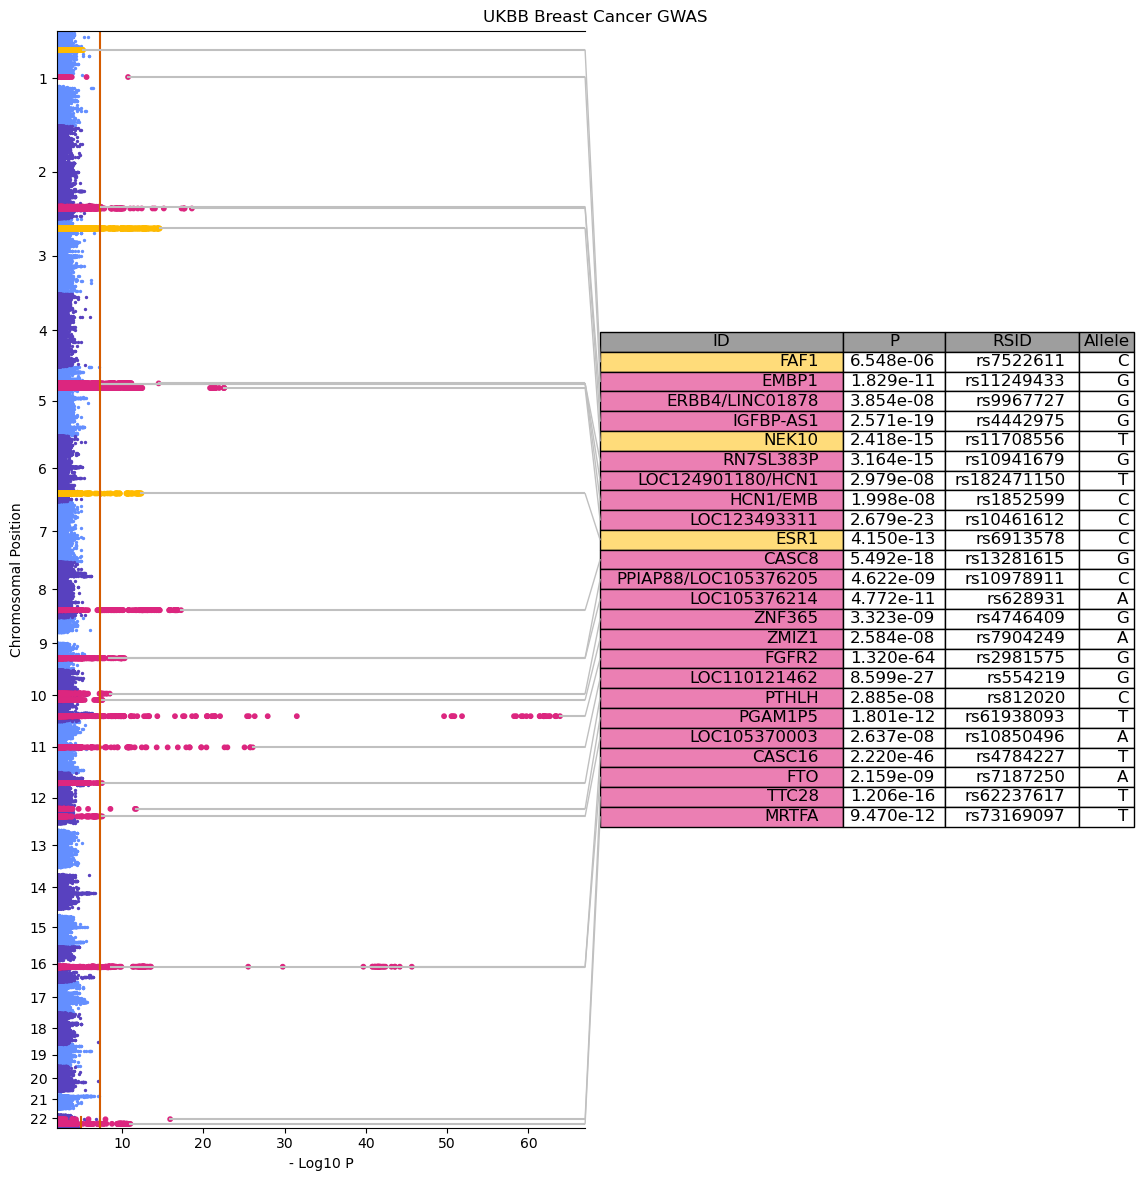

In [19]:
# Vertical Manhattan Plot
mp.update_plotting_parameters(sug=1E-5, annot_thresh=1E-5, sig=5E-8,
                              ld_block=1E6, merge_genes=True,
                              invert=False)

mp.full_plot(rep_genes=known_genes, extra_cols={'RSID': 'RSID', 'effect_allele': 'Allele'},
             rep_boost=True, keep_chr_pos=False)
plt.show()

Horizontal, no color bar
Due to signal merging and replication prioritization, the following genes were renamed:
NEK10: NEK10
LOC124901435: ESR1
FAF1: FAF1


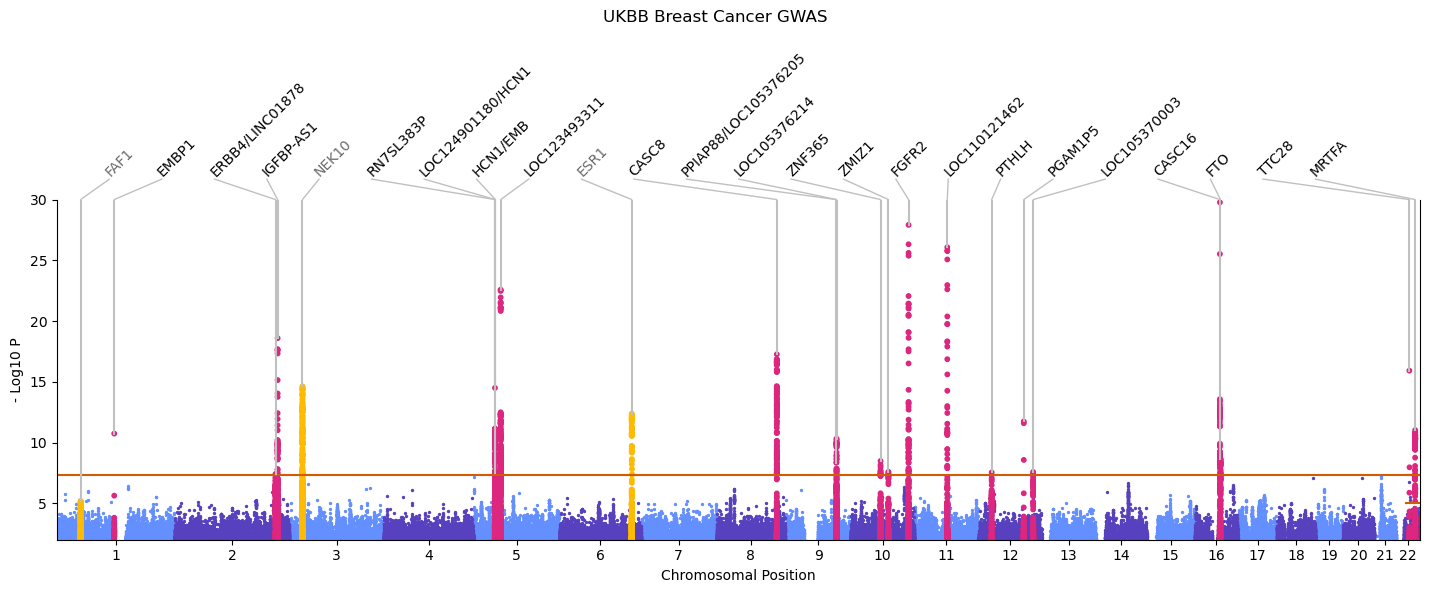

In [23]:
# Horizontal Manhattan Plot
mp.update_plotting_parameters(sug=1E-5, annot_thresh=1E-5, sig=5E-8,
                              ld_block=1E6, merge_genes=True,
                              invert=False, vertical=False, max_log_p=30)

mp.full_plot(rep_genes=known_genes, rep_boost=True, with_table_grid=False, with_table_bg=False)
plt.show()

Due to signal merging and replication prioritization, the following genes were renamed:
NEK10: NEK10
LOC124901435: ESR1
FAF1: FAF1
2.0
ROUNDED_Y


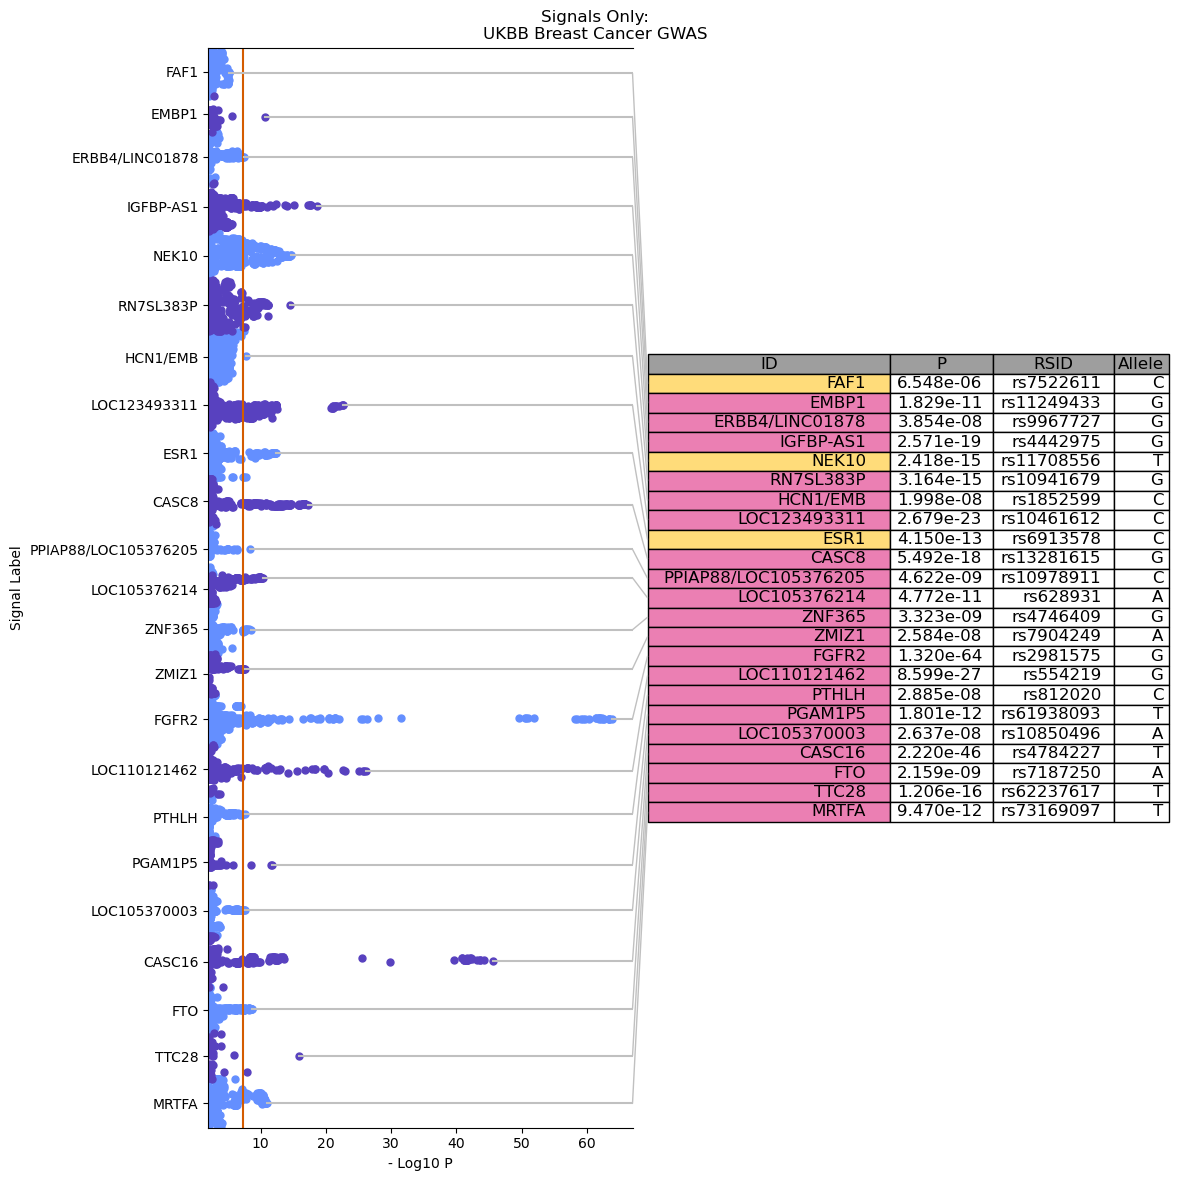

In [20]:
# Signal Plot
mp.update_plotting_parameters(sug=1E-5, annot_thresh=1E-5, sig=5E-8,
                              ld_block=1E6, merge_genes=True,
                              invert=False)

mp.signal_plot(rep_genes=known_genes, extra_cols={'RSID': 'RSID', 'effect_allele': 'Allele'},
             rep_boost=True, keep_chr_pos=False)
plt.show()

0 SNPs Dropped for Missing P
Lambda GC: 17.91212592973822


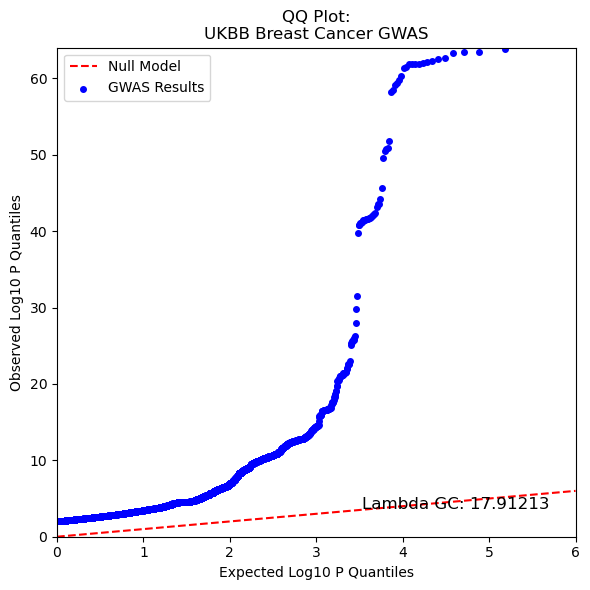

In [21]:
# QQ Plot
mp.qq_plot()
plt.show()